In [483]:
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
from matplotlib import pyplot
# Modulo de optimización de scipy
from scipy import optimize
import pandas as pd
import csv

In [484]:
# cargar a una variable el dataset
data = pd.read_csv("heart_preparado.csv")
data.head()

# 1) edad
# 2) sexo
# 3) presión arterial en reposo
# 4) colesterol sérico en mg/dl
# 5) azúcar en sangre en ayunas > 120 mg/dl
# 6) frecuencia cardíaca máxima alcanzada
# 7) pico anterior = depresión del ST inducida por el ejercicio en relación con el reposo
# 8) objetivo: 0= menos posibilidades de ataque al corazón 1= más posibilidades de ataque al corazón

,63,1,145,233,1.1,150,2.3,1.2
0,37,1,130,250,0,187,3.5,1
1,41,0,130,204,0,172,1.4,1
2,56,1,120,236,0,178,0.8,1
3,57,0,120,354,0,163,0.6,1
4,57,1,140,192,0,148,0.4,1


In [485]:
data = np.loadtxt('heart_preparado.csv', delimiter=',')
X_datos, y_datos = data[:, 0:7], data[:, 7]
print(X_datos)
print(y_datos)

[[ 63.    1.  145.  ...   1.  150.    2.3]
 [ 37.    1.  130.  ...   0.  187.    3.5]
 [ 41.    0.  130.  ...   0.  172.    1.4]
 ...
 [ 68.    1.  144.  ...   1.  141.    3.4]
 [ 57.    1.  130.  ...   0.  115.    1.2]
 [ 57.    0.  130.  ...   0.  174.    0. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

In [486]:
# funcion para la normalizacion de caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    media_norm = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    media_norm = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - media_norm) / sigma
    
    return X_norm, media_norm, sigma

In [487]:
X_norm, media_norm, sigma = featureNormalize(X_datos)

In [488]:
#X = X_norm
X = X_datos
y = y_datos.T
print(X[5])

[ 57.    1.  140.  192.    0.  148.    0.4]


In [489]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))

    return g

In [490]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [491]:
print(X[1])

[  1.   37.    1.  130.  250.    0.  187.    3.5]


In [492]:
# funcion del costo
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [493]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-3.63337671e-04 -1.84112493e-02 -5.85083428e-03 -2.23230250e-02
 -4.06810477e-03  3.51693023e-05  3.46324476e-02 -1.32363375e-02]


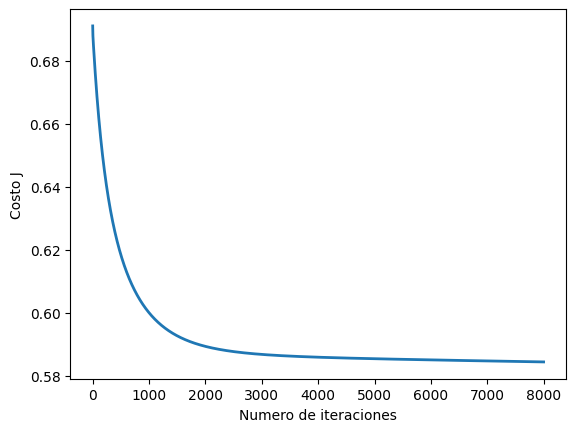

In [494]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001
num_iters = 8000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [505]:
# verificar si le va dar un ataque al corazon o no
# [1, 54, 0, 135, 304, 1, 170, 0.0] que si
# [1, 57, 1, 152, 274, 0, 88, 1.2] que no
X_array = [1, 54, 0, 135, 304, 1, 170, 0.0]
prueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print("Para una persona con esas caracteristicas, se predice una probabilidad de acierto de: {:.3f}%".format(prueba))

Para una persona con esas caracteristicas, se predice una probabilidad de acierto de: 0.655%


In [496]:
# Se prueba la funcion `costFunction` utilizando dos casos de prueba para theta.
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [497]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)

[0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-4.45544554e-02 -1.40429043e+00  3.46534653e-02 -4.60066007e+00
 -8.77557756e+00 -1.65016502e-03 -1.14702970e+01  2.02310231e-01]


In [498]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-2.36589148e-04, -1.64149558e-02, -3.66329988e-03, -2.23703112e-02, -4.20391908e-03, -9.04881023e-06, 3.41271447e-02, -8.66100802e-03])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

[-2.36589148e-04 -1.64149558e-02 -3.66329988e-03 -2.23703112e-02
 -4.20391908e-03 -9.04881023e-06  3.41271447e-02 -8.66100802e-03]
Costo en theta prueba: 0.585


In [499]:
# Establecer las opciones para optimize.minimize
options= {'maxfun': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta_minimze = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta_minimze))

Costo con un valor de theta encontrado por optimize.minimize: 0.483
theta:
	[0.635, -0.012, -1.796, -0.014, -0.007, 0.097, 0.038, -0.662]


In [500]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [504]:
# verificar si le va dar un ataque al corazon o no
# [1, 54, 0, 135, 304, 1, 170, 0.0] que si
# [1, 57, 1, 152, 274, 0, 88, 1.2] que no
X_array = [1, 54, 0, 135, 304, 1, 170, 0.0]

prob = sigmoid(np.dot(X_array, theta_minimze))

print("Para una persona con esas caracteristicas, se predice una probabilidad de acierto de: {:.3f}%".format(prob))

# Compute accuracy on our training set
p = predict(theta_minimze, X)
print("Precisión de entrenamiento: {:.2f} %".format(np.mean(p == y) * 100))

Para una persona con esas caracteristicas, se predice una probabilidad de acierto de: 0.928%
Precisión de entrenamiento: 77.56 %
